# Detailed Comparison of Machine learning and Processing Techniques for Disease Detection

Cardiovascular diseases are the leading cause of death globally, resulted in 17.9 million deaths (32.1%) in 2015, up from 12.3 million (25.8%) in 1990. It is estimated that 90% of CVD is preventable. There are many risk factors for heart diseases that we will take a closer look at.

The main objective of this study is to build a model that can predict the heart disease occurrence, based on a combination of features (risk factors) describing the disease. Different machine learning classification techniques will be implemented and compared upon standard performance metric such as accuracy.

The dataset used for this study was taken from UCI machine learning repository, titled “Heart Disease Data Set”.

Contents of the Notebook:

Dataset structure & description
Analyze, identify patterns, and explore the data
Data preparation
Modelling and predicting with Machine Learning
Conclusion


In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib


from sklearn.metrics import accuracy_score,roc_auc_score
import scikitplot as skplt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 1. Dataset structure & description
The dataset used in this project contains 14 variables. The independent variable that needs to be predicted, 'diagnosis', determines whether a person is healthy or suffer from heart disease. Experiments with the Cleveland database have concentrated on endeavours to distinguish disease presence (values 1, 2, 3, 4) from absence (value 0). There are several missing attribute values, distinguished with symbol '?'. The header row is missing in this dataset, so the column names have to be inserted manually.

Features information:
age - age in years
sex - sex(1 = male; 0 = female)
chest_pain - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
blood_pressure - resting blood pressure (in mm Hg on admission to the hospital)
serum_cholestoral - serum cholestoral in mg/dl
fasting_blood_sugar - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
electrocardiographic - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
max_heart_rate - maximum heart rate achieved
induced_angina - exercise induced angina (1 = yes; 0 = no)
ST_depression - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
no_of_vessels - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
diagnosis - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)
Types of features:
Categorical features (Has two or more categories and each value in that feature can be categorised by them): sex, chest_pain

Ordinal features (Variable having relative ordering or sorting between the values): fasting_blood_sugar, electrocardiographic, induced_angina, slope, no_of_vessels, thal, diagnosis

Continuous features (Variable taking values between any two points or between the minimum or maximum values in the feature column): age, blood_pressure, serum_cholestoral, max_heart_rate, ST_depression



In [2]:
# column names in accordance with feature information
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# read the file
df = pd.read_csv("heart_disease_all15.csv", names=col_names, header=None, na_values="?")

print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

# display the first 5 lines
df.head()


Number of records: 920
Number of variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   920 non-null    int64  
 1   sex                   920 non-null    int64  
 2   chest_pain            920 non-null    int64  
 3   blood_pressure        862 non-null    float64
 4   serum_cholestoral     913 non-null    float64
 5   fasting_blood_sugar   838 non-null    float64
 6   electrocardiographic  919 non-null    float64
 7   max_heart_rate        866 non-null    float64
 8   induced_angina        866 non-null    float64
 9   ST_depression         858 non-null    float64
 10  slope                 801 non-null    float64
 11  no_of_vessels         600 non-null    float64
 12  thal                  700 non-null    float64
 13  diagnosis             920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 100.8 KB


In [4]:
# extract numeric columns and find categorical ones
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)


['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


# 2.Analyze features, identify patterns, and explore the data¶
Target value
Knowing the distribution of target value is vital for choosing appropriate accuracy metrics and consequently properly assess different machine learning models.

Since the values 1-4 indicate that a disease is present, it's reasonable to pull them together.

In [5]:
# count values of explained variable
df.diagnosis.value_counts()


0    411
1    196
3    135
2    135
4     43
Name: diagnosis, dtype: int64

In [6]:
 
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

1    509
0    411
Name: diagnosis, dtype: int64

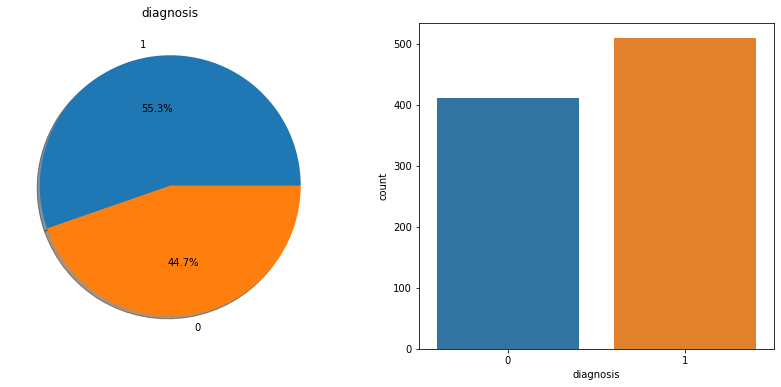

In [7]:
# create two plots side by side
f, ax = plt.subplots(1,2,figsize=(14,6))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis', data=df, ax=ax[1])
plt.show()

# Numeric features
There are 5 numeric columns, so let's take care of them first. Outliers occurrence in the dataset may be a result of wrong input and create undesired noise, thus our role is to evaluate their substance. A data point is considered as an outlier when it falls outside 3 standard deviations.

In [8]:
# view of descriptive statistics
df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,913.000000,866.000000,920.000000,862.000000,858.000000
mean,193.887185,137.376443,53.510870,131.968677,0.878788
std,114.139483,26.385477,9.424685,19.651971,1.091226
min,-9.000000,-9.000000,28.000000,-9.000000,-2.600000
25%,167.000000,120.000000,47.000000,120.000000,0.000000
50%,222.000000,140.000000,54.000000,130.000000,0.500000
75%,267.000000,157.000000,60.000000,140.000000,1.500000
max,603.000000,202.000000,77.000000,200.000000,6.200000


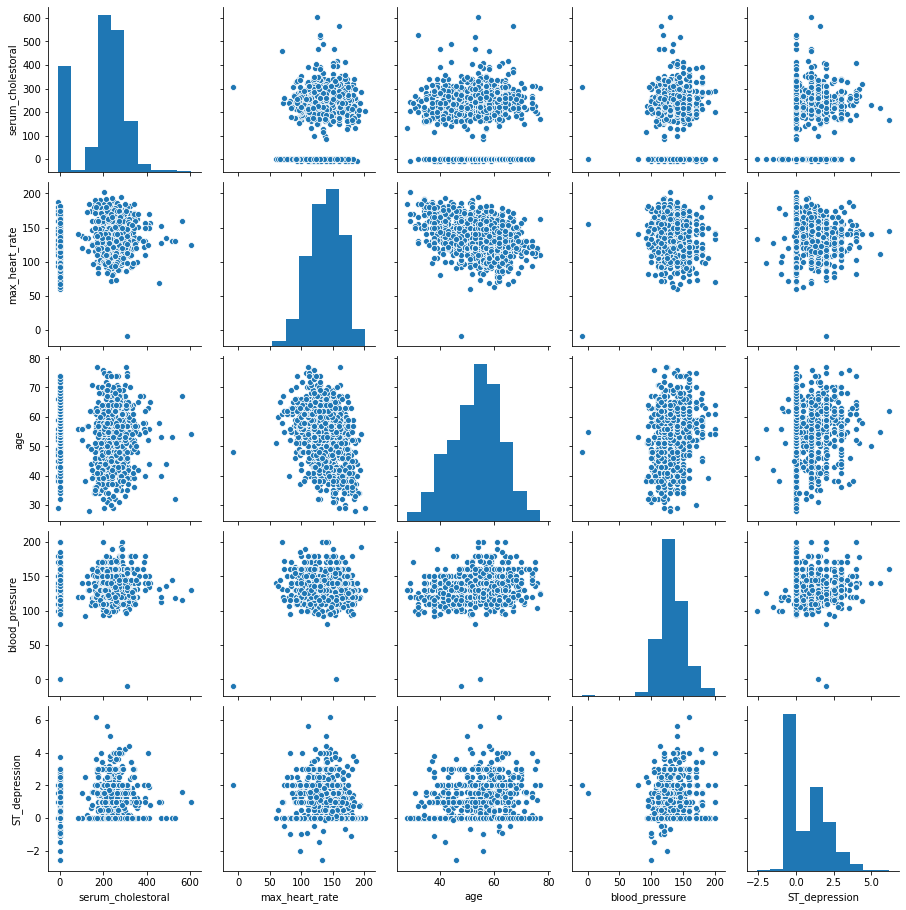

In [9]:
# create a pairplot
sns.pairplot(df[numeric_columns])
plt.show()

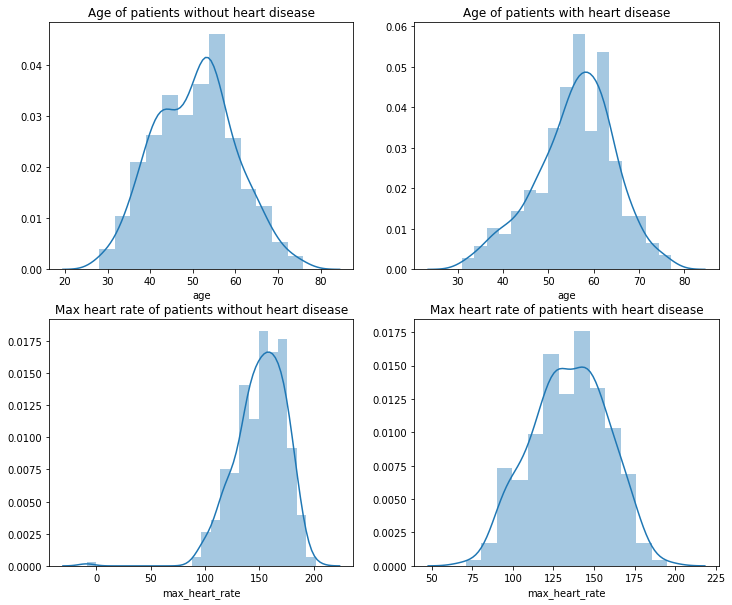

In [10]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].dropna().dropna().max_heart_rate)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].dropna().max_heart_rate)
plt.title('Max heart rate of patients with heart disease')
plt.show()

# Categorical features
Let's take a closer look at categorical variables and see how they impact our target.

In [11]:
# count ill vs healthy people grouped by sex
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0    0            144
     1             50
1    0            267
     1            459
Name: diagnosis, dtype: int64

In [12]:
# average number of diagnosed people grouped by number of blood vessels detected by fluoroscopy
df[['no_of_vessels','diagnosis']].dropna().where(df['no_of_vessels']>= 0).groupby('no_of_vessels').count().apply(lambda x:
                                                 100 * x / float(x.sum()))

,diagnosis
no_of_vessels,
0.0,58.387097
1.0,21.612903
2.0,13.225806
3.0,6.451613
9.0,0.322581


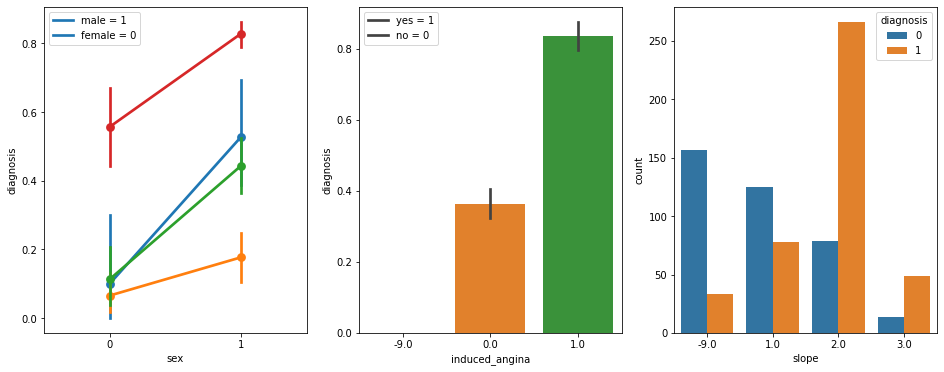

In [13]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="diagnosis", hue='chest_pain', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="induced_angina", y="diagnosis", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='diagnosis', data=df)
plt.show()

# Observations:
Men are much more prone to get a heart disease than women.
The higher number of vessels detected through fluoroscopy, the higher risk of disease.
While soft chest pain may be a bad symptom of approaching problems with heart (especially in case of men), strong pain is a serious warning!
Risk of getting heart disease might be even 3x higher for someone who experienced exercise-induced angina.
The flat slope (value=2) and downslope (value=3) of the peak exercise indicates a high risk of getting diseas

# 3.Data Preparation
In order to make our dataset compatible with machine learning algorithms contained in Sci-kit Learn library, first of all, we need to handle all missing data.

There are many options we could consider when replacing a missing value, for example:

A constant value that has meaning within the domain, such as 0, distinct from all other values
A value from another randomly selected record
A mean, median or mode value for the column
A value estimated by another predictive model

In [14]:

# fill missing values with mode
df.dropna(how='any', inplace=True) 


In [17]:
df.shape
df = df[df.no_of_vessels != -9.0]



In [18]:
# split the data
X, y = df.iloc[:, :-1].fillna(df.mean()), df.iloc[:, -1]
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=2606)

Data needs to be normalized or standardized before applying to machine learning algorithms. Standardization scales the data and gives information on how many standard deviations the data is placed from its mean value. Effectively, the mean of the data (µ) is 0 and the standard deviation (σ) is 1.

In [19]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [20]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
def train_model_info(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred=model.predict(X_test)
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
    
    confusion=confusion_matrix(y_test, y_pred)
    confusion=np.asarray(confusion)
    print(confusion/confusion.sum())
    cmat=confusion/confusion.sum()
    print(model)
    
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cmat, annot=True)
    plt.title('Model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return model
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred=model.predict(X_test)
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# K-Nearest Neighbours (KNN)
K-Nearest Neighbors algorithm is a non-parametric method used for classification and regression. The principle behind nearest neighbour methods is to find a predefined number of training samples closest in distance to the new point and predict the label from these.

Train accuracy: 88.15%
Test accuracy: 82.42%
ROC AUC score 0.8268858800773695
[[0.43956044 0.04395604]
 [0.13186813 0.38461538]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


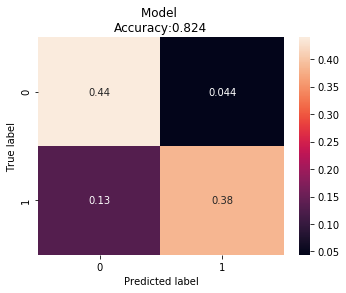

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 74.73%
n_neigbors = 2
Train accuracy: 87.68%
Test accuracy: 75.82%
n_neigbors = 3
Train accuracy: 88.15%
Test accuracy: 82.42%
n_neigbors = 4
Train accuracy: 86.73%
Test accuracy: 78.02%
n_neigbors = 5
Train accuracy: 88.15%
Test accuracy: 82.42%
n_neigbors = 6
Train accuracy: 87.20%
Test accuracy: 78.02%
n_neigbors = 7
Train accuracy: 87.68%
Test accuracy: 83.52%
n_neigbors = 8
Train accuracy: 85.78%
Test accuracy: 79.12%
n_neigbors = 9
Train accuracy: 87.20%
Test accuracy: 83.52%


In [21]:
# KNN

model = train_model_info(X_train, y_train, X_test, y_test, KNeighborsClassifier)
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

# kNN with grid search
Improving the accuracy scores with grid search

In [22]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)

param_grid = dict(n_neighbors=k_range)
#print(param_grid)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,iid=False)
c=grid.fit(X_train,y_train)
print(c)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score','mean_fit_time', 'params']]

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)


,mean_test_score,std_test_score,mean_fit_time,params
0,0.768355,0.090542,0.0011,{'n_neighbors': 1}
1,0.777381,0.068215,0.0007,{'n_neighbors': 2}
2,0.810325,0.091570,0.0009,{'n_neighbors': 3}
3,0.838420,0.087984,0.0004,{'n_neighbors': 4}
4,0.848420,0.077238,0.0004,{'n_neighbors': 5}
5,0.838420,0.073984,0.0006,{'n_neighbors': 6}
6,0.829567,0.081848,0.0006,{'n_neighbors': 7}
7,0.814805,0.081708,0.0005,{'n_neighbors': 8}
8,0.814805,0.067001,0.0009,{'n_neighbors': 9}
9,0.833658,0.062020,0.0004,{'n_neighbors': 10}


Accuracy score 0.8351648351648352
ROC AUC score 0.8375241779497098
[[0.43956044 0.04395604]
 [0.12087912 0.3956044 ]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


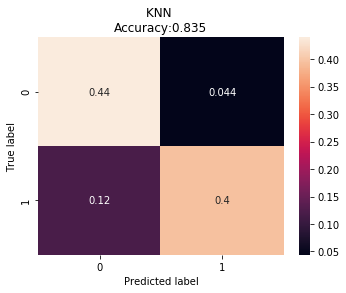

In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=7, p=2,
                                            weights='uniform')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))




confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Decision Trees
DT algorithm creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. It is simple to understand and interpret and it's possible to visualize how important a particular feature was for our tree.

Train accuracy: 100.00%
Test accuracy: 71.43%
ROC AUC score 0.7176015473887815
[[0.3956044  0.08791209]
 [0.1978022  0.31868132]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


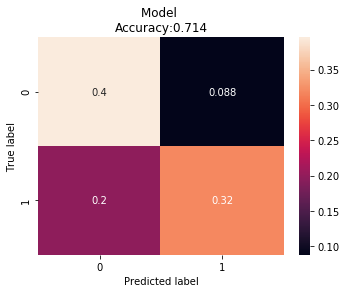

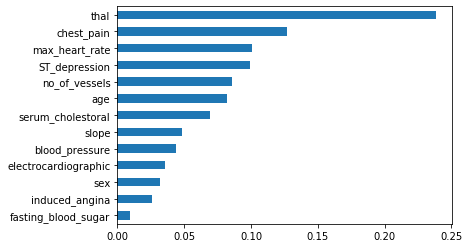

In [24]:
# Decision Tree
model = train_model_info(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=None)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

Variable 'thal' turns out to be a significantly important feature.
Remember my hypothesis that 'fasting_blood_sugar" is a very weak feature? Above graph confirms this clearly.
Decision tree model learns the train set perfectly, and at the same time is entirely overfitting the data, what results in poor prediction. Other values of 'max_depth' parameter need to be tried out.

In [25]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=None)

max_depth = 1
Train accuracy: 74.88%
Test accuracy: 81.32%
max_depth = 2
Train accuracy: 79.62%
Test accuracy: 78.02%
max_depth = 3
Train accuracy: 83.89%
Test accuracy: 82.42%
max_depth = 4
Train accuracy: 87.20%
Test accuracy: 84.62%
max_depth = 5
Train accuracy: 92.42%
Test accuracy: 73.63%
max_depth = 6
Train accuracy: 94.79%
Test accuracy: 74.73%
max_depth = 7
Train accuracy: 98.10%
Test accuracy: 72.53%


In [26]:
param_grid = { 'criterion':['gini','entropy'],'min_samples_split' : range(10,500,20),'max_depth': np.arange(1, 15)}
# decision tree model
clf=DecisionTreeClassifier()
    #use gridsearch to test all values
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')
    #fit model to data
c=grid.fit(X_train,y_train)
print(c.best_estimator_)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score','mean_fit_time', 'params']]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


,mean_test_score,std_test_score,mean_fit_time,params
0,0.715640,0.028412,0.0012,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
1,0.715640,0.028412,0.0012,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
2,0.715640,0.028412,0.0012,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
3,0.715640,0.028412,0.0006,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
4,0.715640,0.028412,0.0010,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
...,...,...,...,...
695,0.563981,0.006144,0.0004,"{'criterion': 'entropy', 'max_depth': 14, 'min..."
696,0.563981,0.006144,0.0004,"{'criterion': 'entropy', 'max_depth': 14, 'min..."
697,0.563981,0.006144,0.0006,"{'criterion': 'entropy', 'max_depth': 14, 'min..."
698,0.563981,0.006144,0.0008,"{'criterion': 'entropy', 'max_depth': 14, 'min..."


### Decision Trees with gridcv

Accuracy score 0.8241758241758241
ROC AUC score 0.8247098646034816
[[0.40659341 0.07692308]
 [0.0989011  0.41758242]]


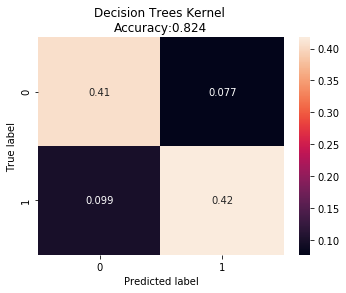

In [27]:
clf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2606, splitter='best')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))

#print(clf.best_estimator_)



confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()


plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('Decision Trees Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Logistic Regression
Logistic regression is a basic technique in statistical analysis that attempts to predict a data value based on prior observations. A logistic regression algorithm looks at the relationship between a dependent variable and one or more dependent variables.

Train accuracy: 84.36%
Test accuracy: 85.71%
ROC AUC score 0.8595261121856866
[[0.45054945 0.03296703]
 [0.10989011 0.40659341]]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


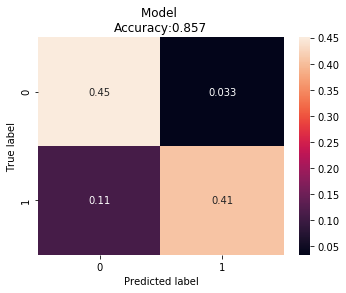

In [28]:
# Logistic Regression
model = train_model_info(X_train, y_train, X_test, y_test, LogisticRegression)

# logistic regression grid search cv

In [29]:
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C=[0.001,.009,0.1,.09,0.12,5,10,25,0.2,0.15]
solver= solver= [ 'lbfgs', 'liblinear', 'sag', 'saga']
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty,solver=solver)
grid = GridSearchCV(LogisticRegression(max_iter=1000), hyperparameters,scoring='accuracy')

# fitting the model for grid search 
grid.fit(X_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'mean_fit_time','params']]

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


,mean_test_score,std_test_score,mean_fit_time,params
0,0.563981,0.000862,0.247000,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}"
1,0.800948,0.028224,0.001000,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli..."
2,0.563981,0.000862,0.014000,"{'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}"
3,0.563981,0.000862,0.002667,"{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}"
4,0.815166,0.037920,0.002333,"{'C': 0.009, 'penalty': 'l2', 'solver': 'lbfgs'}"
5,0.805687,0.038542,0.001000,"{'C': 0.009, 'penalty': 'l2', 'solver': 'libli..."
6,0.815166,0.037920,0.001667,"{'C': 0.009, 'penalty': 'l2', 'solver': 'sag'}"
7,0.815166,0.037920,0.001333,"{'C': 0.009, 'penalty': 'l2', 'solver': 'saga'}"
8,0.819905,0.033689,0.001667,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}"
9,0.810427,0.038763,0.000667,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."


Accuracy score 0.8571428571428571
ROC AUC score 0.8595261121856866
[[0.45054945 0.03296703]
 [0.10989011 0.40659341]]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


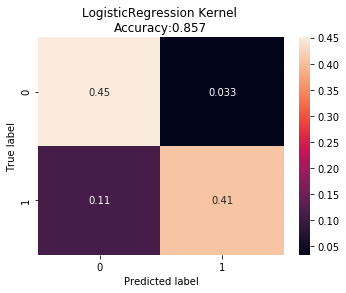

In [31]:
clf=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))




confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('LogisticRegression Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

## Gaussian Naive Bayes
In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Train accuracy: 81.99%
Test accuracy: 87.91%
ROC AUC score 0.8793520309477756
[[0.42857143 0.05494505]
 [0.06593407 0.45054945]]
GaussianNB(priors=None, var_smoothing=1e-09)


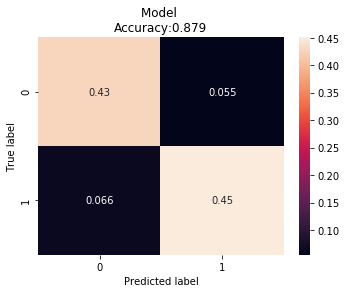

In [32]:
#Gaussian Naive Bayes
model = train_model_info(X_train, y_train, X_test, y_test, GaussianNB)

# Support Vector Machines
Support Vector Machines are perhaps one of the most popular machine learning algorithms. They are the go-to method for a high-performing algorithm with a little tuning. At first, let's try it on default settings.

Train accuracy: 91.47%
Test accuracy: 84.62%
ROC AUC score 0.8481624758220502
[[0.43956044 0.04395604]
 [0.10989011 0.40659341]]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


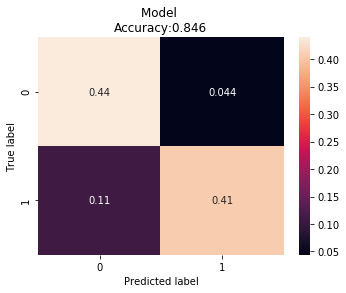

In [33]:
# Support Vector Machines
model = train_model_info(X_train, y_train, X_test, y_test, SVC)

# SVM with gridsearch

In [34]:
k_range = list(range(1, 31))


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 0.05],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,scoring='accuracy') 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score','mean_fit_time' ,'params']]

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5633802816901409, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5633802816901409, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5652173913043478, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8309859154929577, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7746478873239436, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8405797101449275, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf .........................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8309859154929577, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7887323943661971, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8115942028985508, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.5774647887323944, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.5774647887323944, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.5942028985507246, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.8309859154929577, total=   0.0s
[CV] C=10, gamma=1, kernel=linear .....

[CV]  C=100, gamma=0.0001, kernel=linear, score=0.8309859154929577, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.7887323943661971, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.8115942028985508, total=   0.0s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV]  C=0.05, gamma=1, kernel=rbf, score=0.5633802816901409, total=   0.0s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV]  C=0.05, gamma=1, kernel=rbf, score=0.5633802816901409, total=   0.0s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV]  C=0.05, gamma=1, kernel=rbf, score=0.5652173913043478, total=   0.0s
[CV] C=0.05, gamma=1, kernel=linear ..................................
[CV]  C=0.05, gamma=1, kernel=linear, score=0.8309859154929577, total=   0.0s
[CV] C=0.05, gamma=1, ker

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.9s finished


,mean_test_score,std_test_score,mean_fit_time,params
0,0.563981,0.000862,0.003000,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}"
1,0.815166,0.029118,0.001333,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}"
2,0.706161,0.028130,0.001333,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.815166,0.029118,0.001000,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}"
4,0.563981,0.000862,0.001667,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}"
5,0.815166,0.029118,0.001333,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}"
6,0.563981,0.000862,0.001667,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}"
7,0.815166,0.029118,0.000667,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}"
8,0.563981,0.000862,0.002000,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}"
9,0.815166,0.029118,0.001333,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}"


In [35]:
print(grid.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Accuracy score 0.8461538461538461
ROC AUC score 0.8488878143133463
[[0.45054945 0.03296703]
 [0.12087912 0.3956044 ]]
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


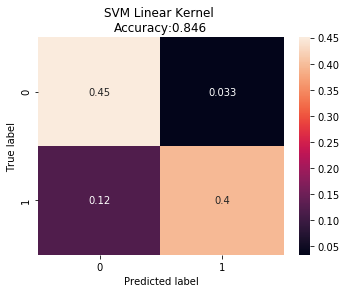

In [36]:
from sklearn.svm import SVC

clf=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))




confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forests
Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Train accuracy: 99.53%
Test accuracy: 82.42%
ROC AUC score 0.8261605415860735
[[0.42857143 0.05494505]
 [0.12087912 0.3956044 ]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2606, verbose=0,
            warm_start=False)


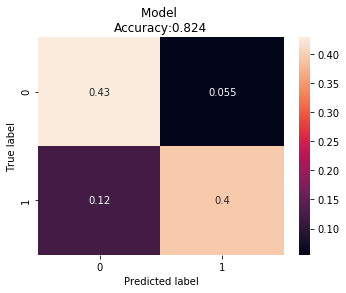

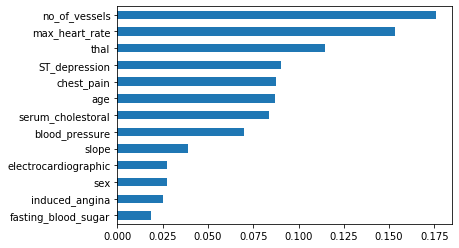

In [37]:
# Random Forests
model = train_model_info(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()


# Random Forest with grid

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [60,100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)


# fitting the model for grid search 
grid.fit(X_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score','mean_fit_time', 'params']]

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


,mean_test_score,std_test_score,mean_fit_time,params
0,0.810427,0.048597,0.0646,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
1,0.824645,0.050065,0.1014,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
2,0.829384,0.045300,0.2046,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
3,0.834123,0.038374,0.5032,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
4,0.810427,0.048597,0.0608,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
...,...,...,...,...
115,0.819905,0.037895,0.5380,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
116,0.796209,0.046475,0.0664,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
117,0.810427,0.049311,0.1100,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
118,0.815166,0.042853,0.2172,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."


Accuracy score 0.8571428571428571
ROC AUC score 0.8595261121856866
[[0.45054945 0.03296703]
 [0.10989011 0.40659341]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


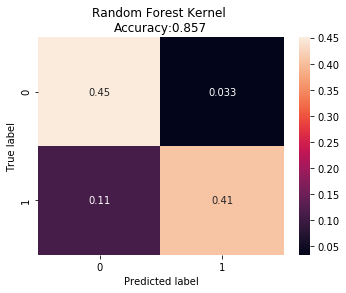

In [39]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))


confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('Random Forest Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#pd.DataFrame(da

# Gradient Boosting

Train accuracy: 100.00%
Test accuracy: 82.42%
ROC AUC score 0.8254352030947776
[[0.41758242 0.06593407]
 [0.10989011 0.40659341]]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=2606,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


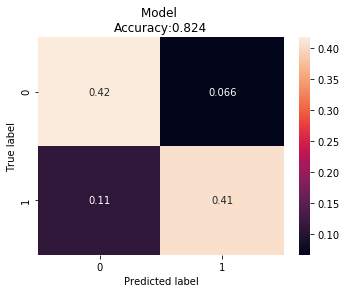

In [40]:
# Gradient Boosting
model = train_model_info(X_train, y_train, X_test, y_test, GradientBoostingClassifier, random_state=2606)

## Gradient Boosting Classifier grid search

In [42]:
param_test2 = {'n_estimators':[40,50,60],'max_depth':range(3,16,1),'learning_rate':[0.2], 'min_samples_split':range(2,500,50),'criterion':['friedman_mse']}

estimator=GradientBoostingClassifier( max_leaf_nodes=None,  min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,  min_weight_fraction_leaf=0.0,    n_iter_no_change=None, presort='auto',  random_state=None, subsample=1.0, tol=0.0001, warm_start=False, 
                           validation_fraction=0.1, verbose=0)

grid = GridSearchCV(estimator =estimator,param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
grid.fit(X_train,y_train)
# fitting the model for grid search 
#grid.fit(X_train, y_train) 

  


print(grid.best_params_) 

print(grid.best_estimator_)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'mean_fit_time','params']]

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 11, 'min_samples_split': 52, 'n_estimators': 40}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=52,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


,mean_test_score,std_test_score,mean_fit_time,params
0,0.815361,0.042863,0.0264,"{'criterion': 'friedman_mse', 'learning_rate':..."
1,0.810820,0.050700,0.0284,"{'criterion': 'friedman_mse', 'learning_rate':..."
2,0.801070,0.062739,0.0306,"{'criterion': 'friedman_mse', 'learning_rate':..."
3,0.824436,0.044742,0.0188,"{'criterion': 'friedman_mse', 'learning_rate':..."
4,0.829198,0.049031,0.0212,"{'criterion': 'friedman_mse', 'learning_rate':..."
...,...,...,...,...
385,0.564022,0.006135,0.0120,"{'criterion': 'friedman_mse', 'learning_rate':..."
386,0.564022,0.006135,0.0132,"{'criterion': 'friedman_mse', 'learning_rate':..."
387,0.564022,0.006135,0.0156,"{'criterion': 'friedman_mse', 'learning_rate':..."
388,0.564022,0.006135,0.0112,"{'criterion': 'friedman_mse', 'learning_rate':..."


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=52,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy score 0.8241758241758241
ROC AUC score 0.8261605415860735
[[0.42857143 0.05494505]
 [0.12087912 0.3956044 ]]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=52,
              min_weight_fractio

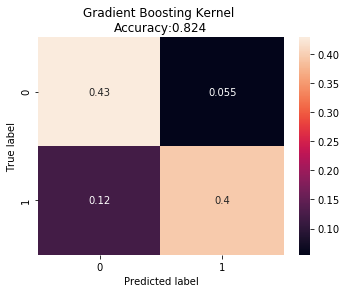

In [43]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
#clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=52,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(clf)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))



confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('Gradient Boosting Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

In [44]:
# initialize an empty list
accuracy = []
roc=[]
mean_squared_errors=[]
precision_scores=[]

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests','Gradient Boosting']

# list of algorithms with parameters
models = [KNeighborsClassifier(),DecisionTreeClassifier(), LogisticRegression(), GaussianNB(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()]

# loop through algorithms and append the score into the list
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred=clf.predict(X_test)
    accuracy.append(score)
    roc.append(roc_auc_score(y_test,y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    mean_squared_errors.append(mean_squared_error(y_test, y_pred))
# create a dataframe from accuracy results
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.824176
Decision Trees,0.758242
Logistic Regression,0.857143
Naive Bayes,0.879121
SVM,0.846154
Random Forests,0.813187
Gradient Boosting,0.824176


## 5. Conclusion
The goal of the project was to compare different machine learning algorithms and predict if a certain person, given various personal characteristics and symptoms, will get heart disease or not. Here are the final results

In [46]:
# initialize an empty list
accuracy = []
roc=[]
mean_squared_errors=[]

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests','Gradient Boosting']

# list of algorithms with parameters
models = [KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=7, p=2,
                                            weights='uniform'), DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'), LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 
        GaussianNB(), SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False),GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=2606, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)]

# loop through algorithms and append the score into the list
from sklearn.metrics import precision_score
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred=clf.predict(X_test)
    accuracy.append(score)
    roc.append(roc_auc_score(y_test,y_pred))
    mean_squared_errors.append(precision_score(y_test, y_pred))
    

In [47]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary


,accuracy
KNN,0.835165
Decision Trees,0.802198
Logistic Regression,0.857143
Naive Bayes,0.879121
SVM,0.846154
Random Forests,0.857143
Gradient Boosting,0.824176


In [48]:
#back propagation nn with 1 hidden layer no of hidden nodes 6 to 20

kf = KFold(n_splits=10)
kf.get_n_splits(X)
clf = GaussianNB()
print(cross_val_score(clf, X, y, cv=kf, n_jobs=1))
print(cross_val_score(clf, X, y, cv=kf, n_jobs=1).mean())

[0.83870968 0.74193548 0.86666667 0.93333333 0.76666667 0.8
 0.86666667 0.86666667 0.73333333 0.83333333]
0.824731182795699


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(17,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy score 0.8131868131868132
ROC AUC score 0.8140715667311411
Train accuracy: 89.57%
Test accuracy: 84.62%
ROC AUC score 0.8488878143133463
[[0.45054945 0.03296703]
 [0.12087912 0.3956044 ]]
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2606, s

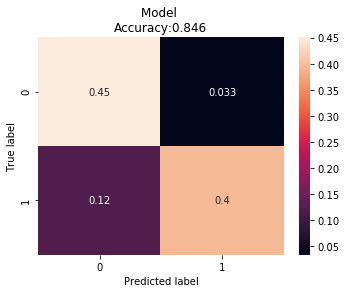

In [49]:
from sklearn.neural_network import MLPClassifier

clf=mlp = MLPClassifier(max_iter=100,hidden_layer_sizes=(17,))
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(clf)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))

model = train_model_info(X_train, y_train, X_test, y_test, MLPClassifier, random_state=2606)

In [50]:
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(6,), (8,), (10,),(12,),(14,),(16,),(18,),(20,)],
'activation': ["logistic", "relu", "Tanh"],
'solver': ['sgd', 'adam']
}
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)

#grid= GridSearchCV(estimator=MLPClassifier,param_grid=parameters,n_jobs=-1,verbose=2,cv=10)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
grid.fit(X_train,y_train)

#print(grid.best_params_) 

#print(grid.best_estimator_)

#pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'mean_fit_time','params']]

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [40, 50, 60], 'max_depth': range(3, 16), 'learning_rate': [0.2], 'min_samples_split': range(2, 500, 50), 'criterion': ['friedman_mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [51]:
from sklearn.neural_network import MLPClassifier
for i in range(6,20):
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    clf=mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=(i))
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #print(cross_val_score(clf, X, y, cv=kf, n_jobs=1))
    #print(cross_val_score(clf, X, y, cv=kf, n_jobs=1).mean())
    #print(clf)
    print("Accuracy score {"+str(i)+"}:"+str(accuracy_score(y_test,y_pred)))
    print("ROC AUC score {"+str(i)+"}:"+str(roc_auc_score(y_test,y_pred)))



Accuracy score {6}:0.8131868131868132
ROC AUC score {6}:0.8140715667311411
Accuracy score {7}:0.8021978021978022
ROC AUC score {7}:0.8041586073500967
Accuracy score {8}:0.7362637362637363
ROC AUC score {8}:0.7425048355899421
Accuracy score {9}:0.8021978021978022
ROC AUC score {9}:0.8041586073500967
Accuracy score {10}:0.6483516483516484
ROC AUC score {10}:0.6508704061895552
Accuracy score {11}:0.8131868131868132
ROC AUC score {11}:0.8140715667311411
Accuracy score {12}:0.7912087912087912
ROC AUC score {12}:0.7927949709864603
Accuracy score {13}:0.8461538461538461
ROC AUC score {13}:0.8459864603481624
Accuracy score {14}:0.8681318681318682
ROC AUC score {14}:0.8687137330754351
Accuracy score {15}:0.8571428571428571
ROC AUC score {15}:0.8588007736943908
Accuracy score {16}:0.8021978021978022
ROC AUC score {16}:0.8034332688588007
Accuracy score {17}:0.8571428571428571
ROC AUC score {17}:0.8580754352030947
Accuracy score {18}:0.8461538461538461
ROC AUC score {18}:0.8467117988394585
Accurac

In [52]:

kf = KFold(n_splits=10)
kf.get_n_splits(X)
clf=mlp = MLPClassifier(activation='logistic', alpha=0.00005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=17, learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=100, momentum=0.9,
              n_iter_no_change=100, nesterovs_momentum=True, power_t=0.5,
              random_state=2000, shuffle=True, solver='adam', tol=0.001,
              validation_fraction=0.1, verbose=False, warm_start=False)
print(cross_val_score(clf, X, y, cv=kf, n_jobs=1))
print(cross_val_score(clf, X, y, cv=kf, n_jobs=1).mean())

[0.90322581 0.80645161 0.8        0.96666667 0.76666667 0.8
 0.8        0.86666667 0.73333333 0.8       ]
0.8243010752688171
